In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv('adult.csv')

In [161]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [172]:
# посмотрим на распределение целевой переменной
df['income'].value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [194]:
# прежде, чем изучить категориальные переменные разобъем возраст на диапазоны
df['age_cat'] = df['age']//5*5

In [164]:
trg = 'income'

In [196]:
cat_columns = []
num_columns = []
for col in df.drop(['income', 'age_cat'], axis=1).columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

In [197]:
cat_columns.append('age_cat')

In [198]:
num_of_cat = np.array([])
for cat in cat_columns:
    num_of_cat = np.append(num_of_cat, df[cat].nunique())

In [199]:
num_of_cat

array([ 9., 16.,  7., 15.,  6.,  5.,  2., 42., 16.])

In [212]:
num_of_cat_norm = list(num_of_cat/num_of_cat.min())

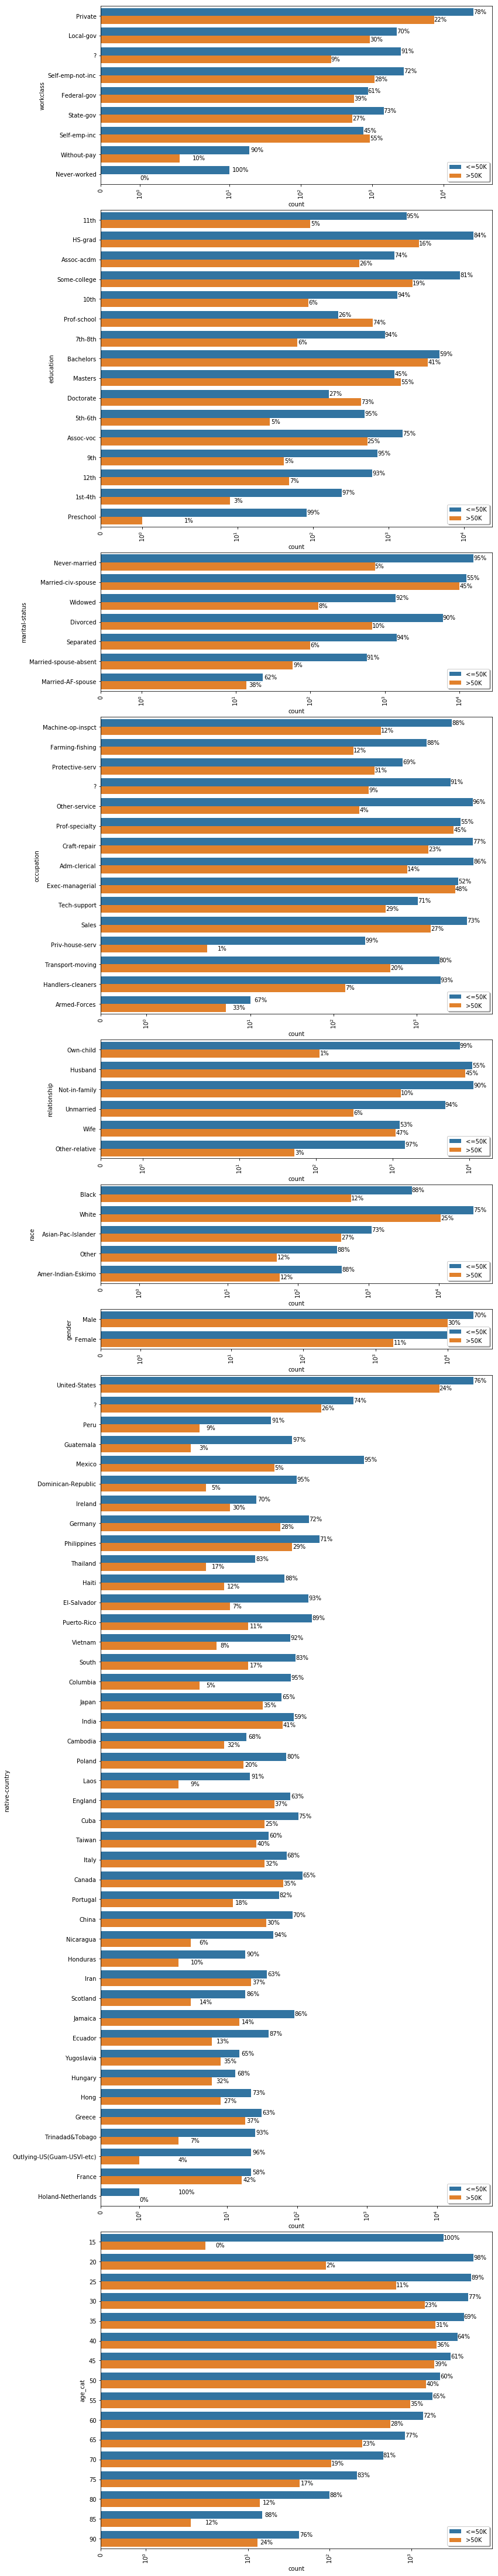

In [211]:
fig, axes = plt.subplots(ncols = 1, nrows=len(cat_columns), 
                figsize=(12, 80),
                gridspec_kw = {'width_ratios': [1],
                                'height_ratios': num_of_cat_norm})


for i, col in enumerate(cat_columns):
    plt.setp(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xscale('symlog')
    sns.countplot(y = col, hue=trg, data=df, ax=axes[i])
    plt.subplots_adjust(hspace=0.1)
    axes[i].legend(loc=4, shadow=True)
    
    bars = axes[i].patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        width_l = left.get_width()
        if pd.isna(width_l):
            width_l = 0
        width_r = right.get_width()
        if pd.isna(width_r):
            width_r = 0
        total = width_l + width_r
        if df[col].nunique()>10:
            axes[i].text(width_l+1, left.get_y() + left.get_height()*0.7, '{0:.0%}'.format(width_l/total), ha="left")
            axes[i].text(width_r+1, right.get_y() + right.get_height()*0.7, '{0:.0%}'.format(width_r/total), ha="left")
        else:
            axes[i].text(width_l+1, left.get_y() + left.get_height()*0.7, '{0:.0%}'.format(width_l/total), ha="left")
            axes[i].text(width_r+1, right.get_y() + right.get_height()*0.7, '{0:.0%}'.format(width_r/total), ha="left")

In [ ]:
Судя по графикам, сильнее всего на целевую переменную влияют: образование, пол, возраст

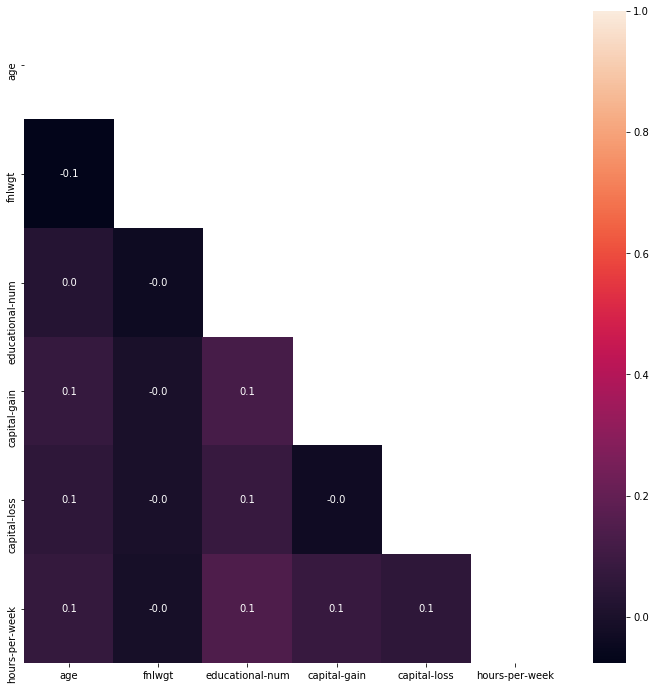

In [202]:
# Посмотрим на корреляцию признаков
corr = df[num_columns].corr()

plt.figure(figsize = (12,12))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

Линейная корреляция числовых признаков - отсутствует

In [215]:
# преобразуем целевую переменную и признак 'gender' в бины
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [217]:
df.drop(['fnlwgt', 'age', 'education'], axis=1, inplace=True)

In [218]:
df.head()

,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_cat
0,Private,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0,25
1,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0,35
2,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1,25
3,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1,40
4,?,10,Never-married,?,Own-child,White,0,0,0,30,United-States,0,15


In [220]:
df.drop(['capital-gain', 'capital-loss', 'hours-per-week', 'income', 'gender'], axis=1).columns

Index(['workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country', 'age_cat'],
      dtype='object')

In [219]:
X = pd.get_dummies(df, df.drop(['capital-gain', 'capital-loss', 'hours-per-week', 'income', 'gender'], axis=1).columns)

ValueError: Length of 'prefix' (8) did not match the length of the columns being encoded (6).

In [28]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(df, test_size=0.2)